In [32]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import copy

In [12]:
base = Image.open("base.jpg")
baseArr = np.array(base)

(336, 388, 3)

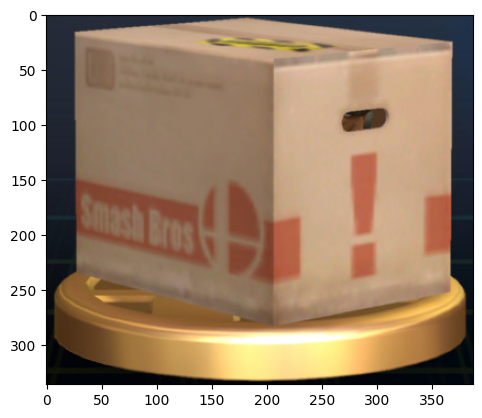

In [112]:
plt.imshow(baseArr)
baseArr.shape
#1st index is px from top second index is px from left

In [65]:
#check if all the edges r the same
for i in range(336):
    if (baseArr[i][0] == baseArr[i][-1]).all():
        print("the same")

In [113]:
topRow = copy.deepcopy(baseArr[0])
botRow = copy.deepcopy(baseArr[-1])

In [71]:
(500 - topRow.shape[0])/2
(500 - baseArr.shape[0])/2

82.0

In [141]:
topLeft = np.zeros(shape=(56,3),dtype=np.uint8)
topRight = np.zeros(shape=(56,3),dtype=np.uint8)
for i in range(56):
    topLeft[i] = copy.deepcopy(topRow[0])
    topRight[i] = copy.deepcopy(topRow[-1])

botLeft = np.zeros(shape=(56,3),dtype=np.uint8)
botRight = np.zeros(shape=(56,3),dtype=np.uint8)
for i in range(56):
    botLeft[i] = copy.deepcopy(botRow[0])
    botRight[i] = copy.deepcopy(botRow[-1])

In [142]:
newTopRow = np.concatenate((topLeft,topRow,topRight))
newBotRow = np.concatenate((botLeft,botRow,botRight))
#82 of each

In [147]:
finalArr = np.zeros(shape=(500,500,3),dtype=np.uint8)
for i in range(82):
    finalArr[i] = copy.deepcopy(newTopRow)

for i in range(336):
    leftEdge = np.zeros(shape=(56,3),dtype=np.uint8)
    rightEdge = np.zeros(shape=(56,3),dtype=np.uint8)
    oldRow = copy.deepcopy(baseArr[i])
    for j in range(56):
        leftEdge[j] = copy.deepcopy(oldRow[0])
        rightEdge[j] = copy.deepcopy(oldRow[-1])
    newRow = np.concatenate((leftEdge,oldRow,rightEdge))
    finalArr[82 + i] = copy.deepcopy(newRow)

for i in range(82):
    finalArr[418 + i] = copy.deepcopy(newBotRow)
    

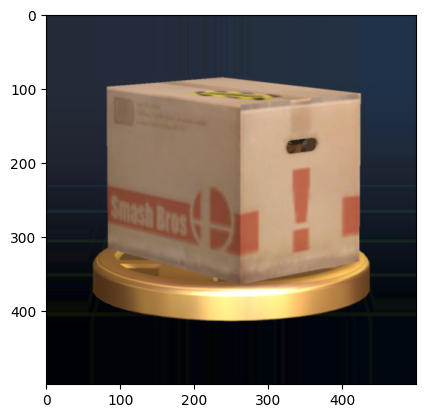

In [148]:
plt.imshow(finalArr)

In [150]:
newImg = Image.fromarray(finalArr)
newImg.save("new.jpg")